Before you turn in your homework, make sure everything runs as expected.

Make sure you execute every single code cell.

**IMPORTANT:**

* **DO NOT DELETE ANY CELL** and do not change the title of the Notebook.

* Before you turn in your homework, make sure everything runs as expected: restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Fill your name below:

In [1]:
name = "Mark Yamakaitis"

# Coding Assignment: Rocket

The equations of motion for a rocket in purely vertical flight are given by

$$
\begin{cases}
\frac{dh}{dt} = v\\
(m_s+m_p) \frac{dv}{dt} = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{cases}
$$

$h$ is the altitude of the rocket

$m_s = 50kg$ is the weight of the rocket shell

$g = 9.81 \frac{m}{s^2}$

$\rho = 1.091 \frac{kg}{m^3}$ is the average air density (assumed constant throughout flight)

$A = \pi r^2$ is the maximum cross sectional area of the rocket, where $r = 0.5 m$

$v_e = 350 \frac{m}{s}$ is the exhaust speed

$C_D = 0.21 $ is the drag coefficient

$m_{po} = 150 kg$ at time $t = 0$ is the initial weight of the rocket propellant

The mass of the remaining propellant is given by:

$$
\begin{equation}
    m_{p} \left( t \right) =
    \begin{cases}
        m_{po} - \int^t_0 \dot{m}_p d\tau & \quad \text{if} \quad t < 4 \\\\
        m_{p \\ t=4} - \int^t_0 \dot{m}_p d\tau & \quad \text{otherwise}
    \end{cases}
\end{equation}
$$

where $\dot{m}_p$ is the time-varying burn rate given by the following figure:

Propellant Burn Rate

<img src="burn_rate.png" width="600px">

that is,

$$
\begin{equation}
    \dot{m}_p \left( t \right) =
    \begin{cases}
        20 & \quad \text{if} \quad t < 4 \\
        0 & \quad \text{otherwise}
    \end{cases}
\end{equation}
$$

Using RK2 technique with a time-step size of $\Delta t=0.05s$, implement a code (in this notebook) to calculate the altitude and velocity of the rocket from launch until crash down.

_Hint:_ To compute the mass of the remaining propellant at a given time $t$, you can directly compute the integral analytically as we have done in class or alternatevely you can use the function `integrate.quad()` from the SciPy package (check the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) to understand how to use it.)

---

## Implement your solution (40 points)

Implement your solution in this section.
You can use as many code cells as you want.

In [2]:
#-------- Import libraries --------
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyp

from IPython.display import display, Markdown
def printm(string):
    display(Markdown(string))

PI = np.pi

In [3]:
## PARAMS ##
m = 50.0      # [kg] shell mass
g = -9.81     # [m/s^2] gravitational acceleration
rho = 1.091   # [kg/m^3] air density
r = 0.5       # [m] Rocket radius
A = PI*r**2   # [m^2] Rocket cross-section
Ue = 350.0    # [m/s] Exhaust velocity
CD = 0.21     # Drag Coefficient
mp0 = 150.0   # [kg] initial weight of fuel
t_burn = 4.0  # [s] burnout time



dt = 0.05 # [s]



def mp_dot(t):
    if (t >= 0 and t < t_burn):
        return 20 # [kg/s]
    else:
        return 0
    
def mp(t):
    if t < 0:
        return mp0
    elif t < t_burn:
        return mp0 - 20*t
    else:
        return mp0 - 20*t_burn

In [4]:
def F_drag(v):
    D = .5 * CD * A * rho * v * abs(v)
    return -D
    
def F_thrust(t):
    return Ue*mp_dot(t)

def Acceleration(t,v):
    accel = (F_drag(v) + F_thrust(t))/(m+mp(t)) + g
    return accel

def RHS(t, hv):
    """
    Calculates the time derivatives of alititude and velocity 
    Args:
    t: current time
    hv: array of altitude and velocity
    
    Returns:
    hv_dt: time derivatives of altitude and velocity in an array
    """
    a = Acceleration(t, v)
    hv_dt = np.array([v, a], np.float64)
    return hv_dt

In [5]:
def rk2(t, dt, rhs, hv):
    a1, a2 = 0, 1     #making it very explicit
    p1, q1 = 0.5, 0.5 
        
    hv_dt1 = RHS(t   , hv) # time derivatives of altitude and velocity at t
    hv_dt2 = RHS(t+p1*dt, (hv + hv_dt1*q1*dt)) # time derivatives and velocity after half-ste
    
    hv_dt = (a1*hv_dt1 + a2*hv_dt2)*dt
    
    return hv + hv_dt

In [6]:
#Solution Initialization

t = 0.0  # [s] Time 0
h = 0.0 # [m] Initial Altitude
v = 0.0 # [m/s] Initial Velocity
history = pd.DataFrame(columns = ['h','v'], dtype=np.float64) #initialize dataframe to hold velocity and alitude data
history.loc[t,:] = [h, v] # index with time 

In [7]:
# simulate
while h >= 0: # 
    (h,v) = rk2(t, dt, RHS, np.array([h,v])) # calculate new alititude and velocity  
    t += dt                                  # incremenet time
    history.loc[t, :] = (h,v)                # log new values

---

## Assessment (60 points)

Answer questions in this section.


**Q1. (10 points)** Using Matplotlib, plot the history of the altitude and velocity of the rocket over time.

Don't forget to include axis labels and a legend, if necessary, to your Matplotlib figure.

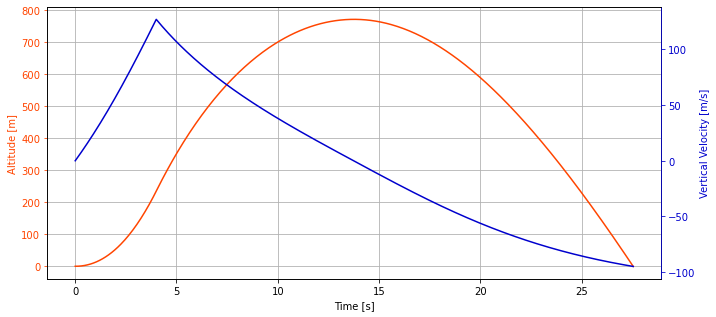

In [8]:
# This probably took longer than the other code
fig, (axh) = pyp.subplots(1, figsize = (11,5), sharex=True)

hcolor = "orangered"
axh.plot(history.index, history['h'], color = hcolor)

axh.set_xlabel("Time [s]")
axh.set_ylabel("Altitude [m]", color = hcolor)
axh.tick_params('y', colors = hcolor)
axh.yaxis.label.set_color(hcolor)
axh.grid(True)
hlabels = [float(label._y) for label in np.copy(axh.get_yticklabels())]
# axh.set_yticks(hlabels)
# axh.set_yticklabels(hlabels, color = hcolor)


vcolor = 'mediumblue'
axv = axh.twinx()
axv.plot(history.index, history['v'], color = vcolor)
axv.set_ylabel("Vertical Velocity [m/s]", color = vcolor)
axv.tick_params('y', colors = vcolor)
vlabels = [float(label._y) for label in np.copy(axv.get_yticklabels())]
# axv.set_yticks(vlabels)
# axv.set_yticklabels(vlabels, color = vcolor);
axv.spines['right'].set_color(vcolor)
axv.yaxis.label.set_color(vcolor)

**Q2. (5 points)** At time $t=15.2s$, what is the mass (in kg) of rocket propellant remaining in the rocket? 

Hint : ~ 70.00 kg

In [13]:
printm(f"Propellant mass at $t = {15.2}$ is $m_p = {mp(15.2):.2f}$ kg")

Propellant mass at $t = 15.2$ is $m_p = 70.00$ kg

**Q3. (15 points)** What is the maximum speed of the rocket in $\frac{m}{s}$? At what time does this occur (in seconds)? What is the altitude at this time (in meters)?

Hint :
\
       ~ 126.74 m/s\
       ~ 4.00 s  \
       ~ 237.69 m

In [10]:
vmax = history['v'].max()
vmax_t = history['v'].idxmax()
vmax_h = history.at[vmax_t, 'h']
printm(f"Maximum Velocity $= {vmax:.2f}$ m/s\n\nat $t = {vmax_t:.2f}$ s and $h = {vmax_h:.2f}$ m")

Maximum Velocity $= 126.96$ m/s

at $t = 4.00$ s and $h = 234.78$ m

**Q4. (10 points)** What is the rocket's maximum altitude during flight (in meters)? At what time (in seconds) does this occur?

Hint : 
\
~771.83 m\
~13.75 s

In [11]:
#-------- Write code --------
hmax = history['h'].max()
hmax_t = history['h'].idxmax()
printm(f"Maximum Altitude $= {hmax:.2f}$ m/s at $t = {hmax_t:.2f}$")

Maximum Altitude $= 771.82$ m/s at $t = 13.75$

**Q5. (20 points)** At what time (in seconds) does the rocket impact the ground? What is the velocity of the rocket (in $\frac{m}{s}$) at time of impact?

The time and velocity of the impact should be linearly interpolated at altitude $h = 0$.

Hint : \
~ 27.53 s \
~ -94.71 m/s

In [12]:
#-------- Write code --------
hf1, hf = history['h'].iloc[-2], history['h'].iloc[-1]
h_impact = 0
interp_dist = (h_impact - hf1) / (hf - hf1) # interpolate between final altitude steps
tf1 = history.index[-2] # time before h became negative 
t_impact = tf1 + interp_dist*dt

vf1, vf = history['v'].iloc[-2], history['v'].iloc[-1]
v_impact = vf1 + interp_dist*(vf-vf1)

printm(f"Impact Time $= {t_impact:.2f}$ and Impact Velocity $= {v_impact:.2f}$ s")

Impact Time $= 27.54$ and Impact Velocity $= -94.86$ s

---

## Derivation of the rocket equations

In case you are kind of confused about the rocket equations, here we show how to get to them. 

Newton's second law states that the acceleration of the vehicle times its mass is equal to all the forces acting on it. Therefore,

\begin{equation}
(m_s + m_p)\frac{d\bf{v}}{dt}=\sum {\bf F}.
\end{equation}
In the above formula we have assumed that the propellant inside the rocket and the rocket move at the same velocity (in other words, their relative velocity is negligible). 

Two of the external forces acting on the rocket are,

\begin{align}
{\bf F}_g&= (m_s+m_p)\bf{g} \quad (\rm{Gravity}),\\
{\bf F}_d&= - \frac{1}{2} \rho_a \mathbf{v} |\mathbf{v}| A  C_D \quad (\rm{Drag}).
\end{align}

We also need to consider the force resulting from the ejection of the propellant. During an interval $dt$, the engine of the rocket ejects downwards a mass of propellant given by $\dot m_p dt$. Relative to the rocket, the speed of the ejected burning gas is assumed constant and equal to $v_e$ (the exhaust speed). The momentum variation induced on the exhaust gas by the engine during that interval is therefore, $d{\bf p}_{gas} = \dot m_p {\bf v}_e dt$. Again using Newton's second law we conclude that the force applied by the rocket on the gas is,

\begin{align}
{\bf F}_{rocket\rightarrow gas} = \frac{d{\bf p}_{gas}}{dt} = \dot m_p {\bf v}_e
\end{align}

Using Newton's third law (|action| = |reaction|), the force exerted by the exhaust gas on the rocket is then,

\begin{align}
{\bf F}_{gas\rightarrow rocket} = -{\bf F}_{rocket\rightarrow gas} = -\dot m_p {\bf v}_e
\end{align}

If we collect all the forces acting on the rocket we finally have:

\begin{align}
(m_s + m_p)\frac{d\bf{v}}{dt}=(m_s+m_p){\bf g}- \frac{1}{2} \rho_a \mathbf{v} |v| A  C_D -\dot m_p {\bf v}_e
\end{align}

